<font size=6  color=#003366> <div style="text-align: center"> [LGBIO2050] - Medical Imaging <br><br> 
<div style="text-align: center"> KMeans </font> <br><br><br>

<font size=5  color=#003366>
<div style="text-align: left"> Professors :   
<font size=4  color=#003366>
<div style="text-align: left"> Prof. G. Kerckhofs  
<div style="text-align: left"> Prof. J. Lee <br>
<div style="text-align: left"> Prof. B. Macq <br>
<div style="text-align: left"> Prof. F. Peeters
<font size=5  color=#003366>
    
<br> <br>
<div style="text-align: left"> Teaching assistants : 
<font size=4  color=#003366>
<div style="text-align: left"> Damien Dasnoy-Sumell (damien.dasnoy@uclouvain.be)<br> 
<div style="text-align: left">Estelle Loÿen (estelle.loyen@uclouvain.be)
<font size=5  color=#003366>
<div style="text-align: right"> 2021-2022 </div>
<br><br>
</font>

**Students:**
* Conet Brieuc ()
* Deside Guillaume (39731800)
* Loffet Alexandre ()

<font size=6 color=#009999> 1. Guidelines and Deliverables </font> <br> 
   - This assignment is due on **November 4th**.
   - Copying code or answers from other groups (or from the internet) is strictly forbidden. Each source of inspiration must be clearly indicated.
   - The jupyter notebook containing the code and **detailed answers** to the questions must be delivered in an
archive (.zip folder) on Moodle. The answers have to be written in English.<br> <br>

<font size=6 color=#009999> 2. Project Purpose </font> <br> <br>

<div style="text-align: justify"> In this challenge, you are asked to cluster blood cells on a micrograph image as shown in the figure below. Clustering refers to a set of unsupervised methods (i.e., data without defined categories or clusters) allowing to group objects (here pixels) in such a way that more similar pixels are grouped together.

![Capture%20d%E2%80%99e%CC%81cran%202021-09-15%20a%CC%80%2009.47.42.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202021-09-15%20a%CC%80%2009.47.42.png)

<font size=6 color=#009999> 3. K-Means algorithm </font> <br> <br>

<font size=4 color=#009999> 3.1 Clustering Formation </font> <br> <br>
<div style="text-align: justify"> Clustering can be defined as the task of grouping a set of objects in such a way 
that objects in the same group (called cluster) are more similar(in some sense or another) to each other than to 
those in other groups (clusters) [1]. In other words, this corresponds to finding, among all $K$-partitions $C_{1}$ <span>&#8746;</span> $C_{2}$ <span>&#8746;</span> ... <span>&#8746;</span> $C_{K}$, the one that minimizes the Sum of the Squared Errors (SSE):

$$ min_{ C_{1} \cup C_{2} \cup ... \cup C_{3} } = \sum_{i=1}\sum_{x  \in  C_{i}} dist(c_{i},x)^{2} $$
 
where $c_{i}$ denotes the mean of each cluster $C_{k}$ (=centroids) [2].


![Capture%20d%E2%80%99e%CC%81cran%202021-09-15%20a%CC%80%2009.54.16.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202021-09-15%20a%CC%80%2009.54.16.png)

<font size=4 color=#009999> 3.2 Pseudo-code </font> <br> <br>
<div style="text-align: justify"> As previously mentioned, the goal of the method is to find $K$ centroids as much as possible far away from each other and assign each object to the nearest centroid. For this purpose, the algorithm iterates between two steps until a stopping criteria is reached (i.e., data points are assigned to the same cluster, maximum number of iterations,...):<br>
1.	Data assignment step: Each data point is assigned to its nearest centroid, (usually) based on the squared Eu- clidean distance.<br>
2.	Centroid update step: Centroids are recomputed by taking the mean of all data points assigned to that centroid’s cluster.<br><br>
This process is depicted by the following pseudo-code:


![Capture%20d%E2%80%99e%CC%81cran%202021-09-15%20a%CC%80%2009.56.44.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202021-09-15%20a%CC%80%2009.56.44.png)

<div style="text-align: justify"> K-Means algorithm is guaranteed to converge to a result. However, the result may be
a local optimum (i.e. not necessarily the best possible outcome), meaning that assessing more than one run of the
algorithm with randomized starting centroids may give a better outcome.

<div class="alert alert-info">
<b>QUESTION 1</b>  <br>
K is a crucial parameter of the method. Can you find an optimal value of this parameter that gives best results?

We computed the sum of each pixel's euclidian distance with the cluster's centroid to determine the optimal K. (We keep the random initiation of centroids). We experimented with K with values ranging from 2 to 5. The best K, according to this approach, is 3.

## Questions pour tutrice :
* preprocessing servira après le k-means où on doit utiliser avant?
* Il ne manque pad make_graphs où c'est un module?
* Les clusters sont en Kx3 pour les 3 composatntes rgb?

In [1]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances

""" -----------------------------------------------------------------------------------------
K-Means clustering method
INPUT : 
    - im: image to cluster
    - K : number of clusters
    - nb_epochs : number of epochs
OUTPUT :
    - RGB image with mean rgb value of corresponding centroid
----------------------------------------------------------------------------------------- """ 

def KMeans(im, K, nb_epochs, with_xy=False):
    img_size = im.size
    clusters = np.random.random_integers(0,K,size=img.size)
    centroids = np.random.random_integers(0,255,size=(K,3))
    for i in range(nb_epochs):
        print(i)
        for j in range(img_size[0]):
            for z in range(img_size[1]):
                best_distance = 10e10
                for cluster_index,cluster_centroid in enumerate(centroids):#which is the best cluster for this point
                    new_dist = euclidean_distances(np.reshape(im.getpixel((j,z)),(1,-1)),np.reshape(cluster_centroid,(1,-1)))
                    if(new_dist < best_distance):
                        best_distance = new_dist
                        clusters[j,z]=cluster_index
        for k in range(K):
            k_indexes = np.argwhere(clusters == k)
            print("K indexes",k_indexes)
            if len(k_indexes)>0:
                sum_r = 0
                sum_g = 0
                sum_b = 0
                for s in range(len(k_indexes)):
                    sum_r += im.getpixel((int(k_indexes[s][0]),int(k_indexes[s][1])))[0]
                    sum_g += im.getpixel((int(k_indexes[s][0]),int(k_indexes[s][1])))[1]
                    sum_b += im.getpixel((int(k_indexes[s][0]),int(k_indexes[s][1])))[2]
                centroids[k] = (1/len(k_indexes))*np.array([sum_r,sum_g,sum_b])
    new_img = Image.new( mode = "RGB", size =img_size)
    for i in range(img_size[0]):
        for j in range(img_size[1]):
            new_img.putpixel((i,j),(int(centroids[clusters[i,j]][0]),int(centroids[clusters[i,j]][1]),int(centroids[clusters[i,j]][2])))
    return new_img


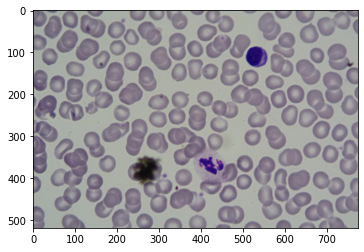

In [4]:
img=Image.open("imgs/blood.jpg")
imshow(np.asarray(img))


/var/folders/89/zfsc637j7g74f00m4crtjxj80000gn/T/ipykernel_756/1045291255.py:19: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
  clusters = np.random.random_integers(0,K,size=img.size)
/var/folders/89/zfsc637j7g74f00m4crtjxj80000gn/T/ipykernel_756/1045291255.py:20: DeprecationWarning: This function is deprecated. Please call randint(0, 255 + 1) instead
  centroids = np.random.random_integers(0,255,size=(K,3))


0
K indexes [[ 53  75]
 [ 53  76]
 [ 53  77]
 ...
 [308  76]
 [309  76]
 [309  77]]
K indexes [[  0   5]
 [  0   6]
 [  0   7]
 ...
 [323 138]
 [323 139]
 [323 140]]
K indexes [[  0   0]
 [  0   1]
 [  0   2]
 ...
 [323 126]
 [323 127]
 [323 128]]
1
K indexes [[ 54  76]
 [ 54  77]
 [ 55  75]
 ...
 [269  75]
 [306  73]
 [306  74]]
K indexes [[  0  16]
 [  0  17]
 [  0  18]
 ...
 [323 138]
 [323 139]
 [323 140]]
K indexes [[  0   0]
 [  0   1]
 [  0   2]
 ...
 [323 126]
 [323 127]
 [323 128]]
2
K indexes [[ 55  75]
 [ 55  76]
 [ 55  77]
 ...
 [269  73]
 [269  74]
 [269  75]]
K indexes [[  0  16]
 [  0  17]
 [  0  18]
 ...
 [323 138]
 [323 139]
 [323 140]]
K indexes [[  0   0]
 [  0   1]
 [  0   2]
 ...
 [323 126]
 [323 127]
 [323 128]]


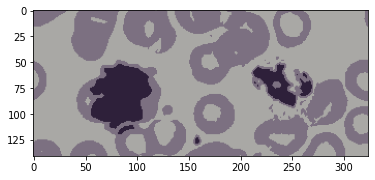

In [3]:
new_img=KMeans(img,3,3)
imshow(np.asarray(new_img))

<font size=4 color=#009999> 3.3 Feature Space </font> <br> <br>
<div style="text-align: justify"> K-Means algorithm requires a proper choice of the feature space in which the 
clustering will be performed. Generally, the RGB (Red Green Blue) space id the most used for pixel clustering. 
In this RGB space, each pixel lies on 3-dimensional space where each axis in one of the component of the pixel color 
in the RGB space. A clustering example in RGB space is represented below [3].

![Capture%20d%E2%80%99e%CC%81cran%202021-09-15%20a%CC%80%2010.00.04.png](attachment:Capture%20d%E2%80%99e%CC%81cran%202021-09-15%20a%CC%80%2010.00.04.png)

<div class="alert alert-info">
<b>QUESTION 2</b>  <br>
Other features spaces can be used in order to perform the clustering. For example, RGB + x and y coordinates of pixel
in the image space can be used. Do you observe any improvement by adding pixel location? Do you have any idea of 
other features that can be used?

We can see that when the argument with xy is True, the clustering picture loses some information. It can be explained by the large number of cells spread around the picture.

<div class="alert alert-info">
<b>QUESTION 3</b>  <br> The result of K-Means depends on the centroids initialization. Can you find a better way to assign those
values?

Manually selecting the centroids initialization is a better technique to assign. It allows you to experiment with several centroids to discover the ideal one while remaining aware of your surroundings.

## Kmeans from Sklearn

At the beginning, I was not sur of my results. I use the Kmeans from the package sklearn to compare results.I obtained the same result with K=3.

adapted from : https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

In [34]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [35]:
imgbis=Image.open("imgs/blood.jpg")
imgbis_array = np.asarray(imgbis)/255

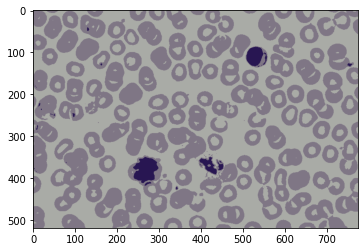

In [36]:
w, h, d = original_shape = tuple(imgbis_array.shape)
assert d == 3
imagebis_array = np.reshape(imgbis_array, (w * h, d))
imagebis_array_sample = shuffle(imagebis_array, random_state=4, n_samples=1_000)
kmeans = KMeans(n_clusters=3, random_state=4,max_iter=30).fit(imagebis_array_sample)
labels = kmeans.predict(imagebis_array)
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)
imshow((recreate_image(kmeans.cluster_centers_, labels, w, h)))

# References
[1] LV Bijuraj. Clustering and its applications. In Proceedings of National Conference on New Horizons in IT-NCNHIT, page 169, 2013. <br>
[2] Clustering Paolo Ferragina Dipartimento di Informatica Università di Pisa.	http:// slideplayer.com/slide/8363774/. <br>
[3] Slides from lelec2885 Image Processing and Computer vision. Laurent Jacques. <br>
